In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression

def get_decomposition(recommendation_elo_scores: dict, feature_elo_scores: dict, hotel_names: list):
        # We need to get the elo scores.
        # Sort the feature elo scores alphabetically. Then convert to a numpy array. And then use collumn stack. 

        raw_elo_scores = []   
        
        # Prepearing the elo score dict to be stacked.   
        for elo_score_tuples in feature_elo_scores.values():
            sorted_elo_score_tuples = sorted(elo_score_tuples, key=lambda x: x[1])
            print(sorted_elo_score_tuples)
            sorted_elo_score = [x[0] for x in sorted_elo_score_tuples]
            raw_elo_scores.append(sorted_elo_score)

        X_regressors = np.column_stack(raw_elo_scores)

        # Getting the corresponding y values.         
        Y_values = [x[0] for x in sorted(recommendation_elo_scores, key=lambda x: x[1])]

        # Fitting the linear regression model.
        reg = LinearRegression().fit(X_regressors, Y_values)
        
        # Now we will get return the covariate feature pairs. 
        return list(zip(feature_elo_scores.keys(), reg.coef_))

As we cannot have sklearn and openai it seems we will resort to running them in different kernels. We just need to get the scores 

In [1]:
master_prompt = 'Which hotel do you recommend more {} or {}, on the basis of {}? State the name of the hotel you prefer only and nothing else. '

features = ['value for money', 'luxury', 'location', 'food', 'being close to the beach']

# I have removed the shard as it is the same as the shangri.
pairwise_words = ['The Savoy', 'The Langham', 'The Ritz', 'The Ned', 'Claridges', 'The Shangri', 'The Dorchester'] 

In [2]:
import pickle 

recomendation_elo_scores = [(2.6741629983024118, 'The Ritz'), (1.2011782279982344, 'The Savoy'), (0.6324022829819813, 'The Dorchester'), (0.5710428409098807, 'The Langham'), (-0.5732856334090939, 'The Ned'), (-0.7661857400225411, 'Claridges'), (-2.0441528233787087, 'The Shangri')]

with open(fr'.\pickles\elo_scores_london_test_run.pkl', 'rb') as file:
    feature_elo_scores =  pickle.load(file)

In [8]:
print([x[1] for x in feature_elo_scores['location']])
print([x[1] for x in feature_elo_scores['value for money']])


['Claridges', 'The Shangri', 'The Langham', 'The Dorchester', 'The Ritz', 'The Savoy', 'The Ned']
['The Savoy', 'The Ritz', 'Claridges', 'The Dorchester', 'The Shangri', 'The Langham', 'The Ned']


In [24]:
feature_decomposition = get_decomposition(recomendation_elo_scores, feature_elo_scores, pairwise_words)


[(-0.9604107770382644, 'Claridges'), (-0.7729208843880055, 'The Dorchester'), (1.989797456491661, 'The Langham'), (3.991283976152788, 'The Ned'), (-1.3896082237688172, 'The Ritz'), (-2.108179038224915, 'The Savoy'), (-0.7499625092244493, 'The Shangri')]
[(-0.9564250066649516, 'Claridges'), (1.0020534092623554, 'The Dorchester'), (-0.3969724384692235, 'The Langham'), (-4.1049640391666955, 'The Ned'), (4.1117687357031105, 'The Ritz'), (0.4787691630008373, 'The Savoy'), (-0.13422982366543268, 'The Shangri')]
[(-2.6830919193402876, 'Claridges'), (0.4708957495016102, 'The Dorchester'), (0.2770035569704947, 'The Langham'), (1.5485041914423023, 'The Ned'), (0.8937731634045248, 'The Ritz'), (1.0501334312071284, 'The Savoy'), (-1.5572181731857733, 'The Shangri')]
[(1.5737820861636074, 'Claridges'), (0.2519085958256934, 'The Dorchester'), (-1.4999535408372924, 'The Langham'), (1.261875888544305, 'The Ned'), (1.010748753955646, 'The Ritz'), (-0.23619382530681166, 'The Savoy'), (-2.362167958345147

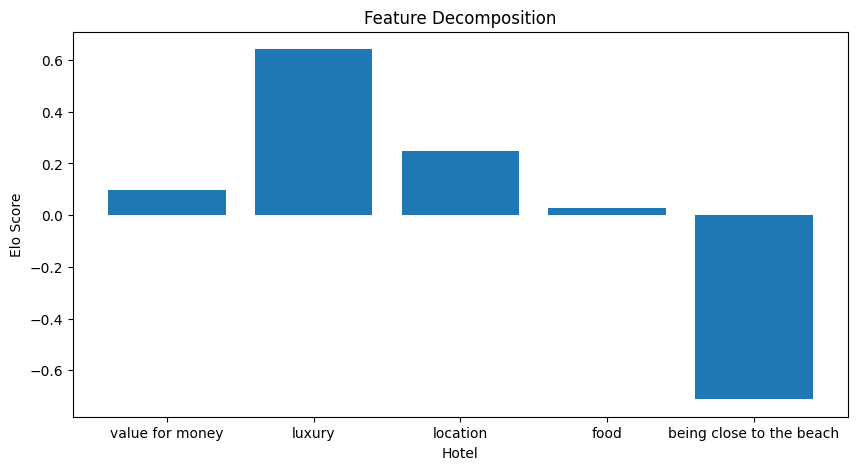

In [26]:
import matplotlib.pyplot as plt

# Extracting the hotel names and elo scores from feature_decomposition
hotel_names, elo_scores = zip(*feature_decomposition)

# Creating a bar chart
plt.figure(figsize=(10, 5))
plt.bar(hotel_names, elo_scores)
plt.xlabel('Hotel')
plt.ylabel('Elo Score')
plt.title('Feature Decomposition')
plt.show()